### Import libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import unittest
from sklearn.model_selection import KFold
from sklearn import model_selection
from numpy import save

### Set Path


In [2]:
data_directory = r"C:\Users\Desktop\Desktop\JuPyter Notebooks\data\Cats&Dogs\PetImages"
categories = ["Dog", "Cat"]

### Classes


In [3]:
def check_category(categories):
    i = 0
    for category in categories:
        path = os.path.join(data_directory, category)
        for image in os.listdir(path):
            category_example = cv2.imread(
                os.path.join(path, image), cv2.IMREAD_GRAYSCALE
            )
            plt.subplot(1, 1, i + 1)
            plt.imshow(category_example, cmap="gray")
            plt.title(category)
            plt.show()
            break
    return category_example

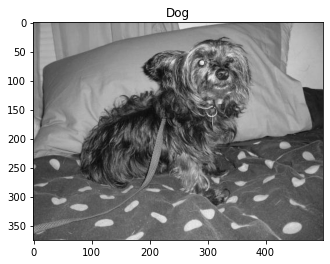

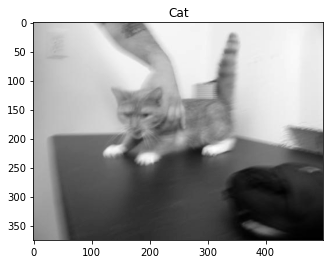

In [4]:
category_example = check_category(categories)

### Resize images to a standard size

In [5]:
img_size = 90
new_array = cv2.resize(category_example, (img_size, img_size))


test_size = 0.2  # split for train and test

In [6]:
data = []


def load_data():
    for category in categories:
        path = os.path.join(data_directory, category)
        num_categories = categories.index(category)
        for image in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                data.append([new_array, num_categories])
            except Exception as e:
                pass
    return data

In [7]:
data = load_data()

In [8]:
random.shuffle(data)

In [9]:
def create_train_set(data, test_size):
    X = []
    Y = []
    for features, label in data:
        X.append(features)
        Y.append(label)

    X = np.array(X).reshape(-1, img_size, img_size, 1)
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
        X, Y, test_size=test_size, random_state=42, shuffle=True
    )
    
    #Normalizing images for feature scaling and appropriate convergence during hill climb/SGD algorithms
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return X_train, X_test, Y_train, Y_test

In [10]:
X_train, X_test, Y_train, Y_test = create_train_set(data, test_size)

In [11]:
def save_data():
    save("X_train_cats-dogs.npy", X_train)
    save("X_test_cats-dogs.npy", X_test)
    save("Y_train_cats-dogs.npy", Y_train)
    save("Y_test_cats-dogs.npy", Y_test)

In [12]:
class Test(unittest.TestCase):
    def test_shapes(self):
        len_data = 24946
        len_Y_test = int(np.ceil(len_data * test_size))
        len_Y_train = len_data - len_Y_test
        X_train_shape = (len_Y_train, img_size, img_size, 1)
        X_test_shape = (len_Y_test, img_size, img_size, 1)

        self.assertEqual(len_data, len(data))
        self.assertEqual(len_Y_test, len(Y_test))
        self.assertEqual(len_Y_train, len(Y_train))
        self.assertEqual(X_train_shape, X_train.shape)
        self.assertEqual(X_test_shape, X_test.shape)
        self.assertEqual(
            [1.0, 0.0, 1.0, 0.0],
            [np.max(X_train), np.min(X_train), np.max(X_test), np.min(X_test)],
        )


if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored"], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.144s

OK


In [13]:
save_data()